## Importation des différentes librairies dont nous avons besoin et ouverture du fichier de données que nous allons étudier

In [4]:
# Import all the libraries we need for the brief
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re

# Reading of the TSV file by choosing 10 000 random rows
# read_food_data = pd.read_csv('/home/apprenant/Documents/Brief-5-Rachid-Karbiche/data/01_raw_data/en.openfoodfacts.org.products.tsv', sep= '\t', low_memory= False)

# Showing all the rows and the columns
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# read_food_data.shape

Comme le fichier de données est assez volumineux, j'ai choisi de faire un premier tri en ne gardant que les entrées ayant comme valeur de countries 'France' car notre étude se concentre sur le marché français.

In [5]:
# Converting in the countries_en column all values containing 'France' into 'France'
# read_food_data["countries_en"] = read_food_data["countries_en"].apply(
#     lambda x: "France" if re.match(r".*(France).*", str(x), re.IGNORECASE) else x)

# read_food_data = read_food_data.loc[read_food_data.countries_en == 'France']
# read_food_data.shape

Au lieu des 356 027 entrées initiales, nous avons au final 129 320 entrées dont la valeur du pays est la France. On travaillera donc sur ce nouveau tableau que nous allons enregistrer.

In [6]:
# Saving of the random rows in a new file
# exported_data = read_food_data.to_csv('/home/apprenant/Documents/Brief-5-Rachid-Karbiche-2/data/01_raw_data/french_openfoodfacts_data.csv', index=False)

# Reading of the new CSV file
french_food_data = pd.read_csv('/home/apprenant/Documents/Brief-5-Rachid-Karbiche/data/01_raw_data/french_openfoodfacts_data.csv', low_memory= False)
french_food_data.shape

(129320, 163)

Nous avons donc bien dans notre nouveau tableau 129 320 entrées.

## Examen des différentes colonnes de la base de données

In [7]:
print(french_food_data.shape)
print('------------------------------')
print(french_food_data.columns.values)
print('------------------------------')

(129320, 163)
------------------------------
['code' 'url' 'creator' 'created_t' 'created_datetime' 'last_modified_t'
 'last_modified_datetime' 'product_name' 'generic_name' 'quantity'
 'packaging' 'packaging_tags' 'brands' 'brands_tags' 'categories'
 'categories_tags' 'categories_en' 'origins' 'origins_tags'
 'manufacturing_places' 'manufacturing_places_tags' 'labels' 'labels_tags'
 'labels_en' 'emb_codes' 'emb_codes_tags' 'first_packaging_code_geo'
 'cities' 'cities_tags' 'purchase_places' 'stores' 'countries'
 'countries_tags' 'countries_en' 'ingredients_text' 'allergens'
 'allergens_en' 'traces' 'traces_tags' 'traces_en' 'serving_size'
 'no_nutriments' 'additives_n' 'additives' 'additives_tags' 'additives_en'
 'ingredients_from_palm_oil_n' 'ingredients_from_palm_oil'
 'ingredients_from_palm_oil_tags'
 'ingredients_that_may_be_from_palm_oil_n'
 'ingredients_that_may_be_from_palm_oil'
 'ingredients_that_may_be_from_palm_oil_tags' 'nutrition_grade_uk'
 'nutrition_grade_fr' 'pnns_group

Dans un premier temps, on constate que nous retrouvons 163 colonnes au total dans la base. Il faut donc procéder à un premier tri en enlevant les variables qui nous sont complètement inutiles dans le cadre de notre projet.

    Observons

In [8]:
selected_french_food_data = french_food_data[['product_name', 'generic_name', 'brands', 'brands_tags', 'categories', 'categories_tags', 'categories_en', 'origins', 'origins_tags', 'labels', 'labels_tags', 'labels_en', 'countries_en', 'ingredients_text', 'allergens', 'allergens_en', 'traces', 'traces_tags', 'traces_en', 'additives_n', 'additives', 'additives_tags', 'additives_en', 'ingredients_from_palm_oil_n', 'ingredients_from_palm_oil', 'ingredients_from_palm_oil_tags', 'ingredients_that_may_be_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil', 'ingredients_that_may_be_from_palm_oil_tags', 'nutrition_grade_fr', 'pnns_groups_1', 'pnns_groups_2', 'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', '-sucrose_100g', '-glucose_100g', '-fructose_100g', '-lactose_100g', '-maltose_100g', '-maltodextrins_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'vitamin-d_100g', 'vitamin-c_100g', 'calcium_100g', 'iron_100g', 'fruits-vegetables-nuts_100g', 'fruits-vegetables-nuts-estimate_100g', 'carbon-footprint_100g', 'nutrition-score-fr_100g', 'nutrition-score-uk_100g', 'glycemic-index_100g']]
selected_french_food_data.head()

,product_name,generic_name,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,labels,labels_tags,labels_en,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-d_100g,vitamin-c_100g,calcium_100g,iron_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g
0,Farine de blé noir,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Naturablue original,NaN,Natura4ever,natura4ever,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Filet de bœuf,NaN,NaN,NaN,Filet de bœuf,fr:filet-de-boeuf,fr:Filet-de-boeuf,NaN,NaN,NaN,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Naturakrill original,NaN,Natura4ever,natura4ever,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Après observation de ces différentes colonnes, on constate que :
- beaucoup de ces colonnes sont de la métadonnée (code, url, creator, ...). Elles concernent uniquement la création de la data dans la base. Elles ne nous serviront pas
- de nombreux éléments présentés concernant l'aliment nous semblent superflus (potassium, phosphore, zinc, ...). Le but ici est de se concentrer sur ce qui concerne le nutri-score mais aussi d'autres éléments connus largement des consommateurs (vitamines C et D, huile de palme, calcium, fer, ...)
- certaines colonnes devront être observées plus précisément afin de ne pas faire doublon avec d'autres (les différents sucres, le nutrition score fr et uk, ...)

Procédons à un deuxième examen de nos colonnes en vérifiant les données manquantes dans chacune d'entre elles.

In [9]:
selected_french_food_data.isnull().sum(axis = 0)

product_name                                    6287
generic_name                                   87722
brands                                         11858
brands_tags                                    11873
categories                                     52451
categories_tags                                52451
categories_en                                  52451
origins                                       111565
origins_tags                                  111575
labels                                         82937
labels_tags                                    82902
labels_en                                      82902
countries_en                                       0
ingredients_text                               42603
allergens                                      98572
allergens_en                                  129320
traces                                        106760
traces_tags                                   106761
traces_en                                     

A première vue, on constate que de nombreuses colonnes ne présentent quasiment que des données manquantes (glycemic-index_100g par exemple). Pour ce genre de données, on sait qu'elles ne dépendent pas réellement d'autres dans la base ou que leur calcul ne peut pas se faire. Ces colonnes n'ont donc pas à être gardées.



## Quid des colonnes similaires ?

On va maintenant étudier les colonnes présentant des données similaires. Nous allons commencer par le product_name et le generic_name. On va vérifier les product_name qui sont nuls là où les generic_name ne le sont pas.

In [10]:
selected_french_food_data.loc[(selected_french_food_data.product_name.isnull()) & (selected_french_food_data.generic_name.notnull())]
selected_french_food_data.loc[(selected_french_food_data.product_name.isnull()),'product_name'] = selected_french_food_data['generic_name']
selected_french_food_data.product_name.isnull().value_counts()

/home/apprenant/Documents/Brief-5-Rachid-Karbiche/env/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


False    123065
True       6255
Name: product_name, dtype: int64

Vérifions :

In [11]:
selected_french_food_data.loc[(selected_french_food_data.product_name.isnull()) & (selected_french_food_data.generic_name.notnull())]

,product_name,generic_name,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,labels,labels_tags,labels_en,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-d_100g,vitamin-c_100g,calcium_100g,iron_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g


C'est ok pour ces deux colonnes. On peut donc supprimer generic_name

Vérifions avec brands et brands_tags

In [12]:
selected_french_food_data.loc[(selected_french_food_data.brands.isnull()) & (selected_french_food_data.brands_tags.notnull())]

,product_name,generic_name,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,labels,labels_tags,labels_en,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-d_100g,vitamin-c_100g,calcium_100g,iron_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g
88078,[n. a!] Nature Addicts Rice Crackers Paprika,NaN,NaN,na,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,"Farine de riz (85% origine Thailande), huile d...",NaN,NaN,"Soja,Lait,Poisson","en:fish,en:milk,en:soybeans","Fish,Milk,Soybeans",1.0,[ farine-de-riz -> fr:farine-de-riz ] [ far...,en:e330,E330 - Citric acid,0.0,NaN,NaN,0.0,NaN,NaN,NaN,unknown,unknown,1895.0,9.8,1.9,85.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88080,My mix Blue Boost,NaN,NaN,na,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,d,NaN,NaN,2054.0,NaN,3.7,NaN,32.0,NaN,NaN,NaN,NaN,NaN,NaN,7.6,10.0,0.05,0.019685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,11.0,NaN


Ici, deux lignes présentent un brands inexistant et un brands_tags existant. Or, on constate que les deux lignes présentent un brands_tags avec comme valeur 'na'. De ce fait, on peut supprimer directement la colonne brands_tags. 

Text(0.5, 1.0, 'Proportion of NaNs in each column')

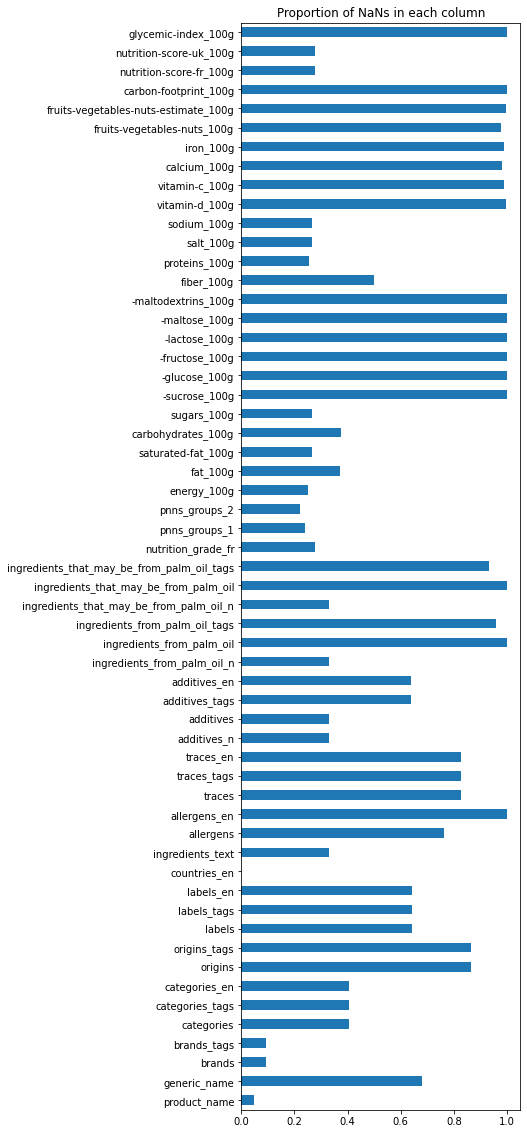

In [13]:
plt.figure(figsize=(5, 20))
selected_french_food_data.isnull().mean(axis=0).plot.barh()
plt.title("Proportion of NaNs in each column")

En outre, d'autres colonnes ne présentent que des valeurs nulles : allergens_en, ingredients_from_palm_oil, ingredients_that_may_be_from_palm_oil, glycemic-index_100g. De ce fait, on peut les écarter. D'autres, comme les différents éléments liés au sucre, sont à observer afin de compléter la colonne sugars.

Ici, pour les sous-catégories de sucre, nous allons remplacer toutes les valeurs inconnues par 0 afin de ne pas être embêté lorsqu'on fait une somme de toutes les valeurs. En effet, la colonne sugars_100g est la somme de tous les autres types de sucre.

In [14]:
selected_french_food_data.loc[selected_french_food_data['-sucrose_100g'].isnull(), '-sucrose_100g'] = 0.0
selected_french_food_data.loc[selected_french_food_data['-glucose_100g'].isnull(), '-glucose_100g'] = 0.0
selected_french_food_data.loc[selected_french_food_data['-fructose_100g'].isnull(), '-fructose_100g'] = 0.0
selected_french_food_data.loc[selected_french_food_data['-lactose_100g'].isnull(), '-lactose_100g'] = 0.0
selected_french_food_data.loc[selected_french_food_data['-maltose_100g'].isnull(), '-maltose_100g'] = 0.0
selected_french_food_data.loc[selected_french_food_data['-maltodextrins_100g'].isnull(), '-maltodextrins_100g'] = 0.0

/home/apprenant/Documents/Brief-5-Rachid-Karbiche/env/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Faisons maintenant la somme de tous les sucres afin de garder uniquement la colonne sugars_100g :

In [15]:
selected_french_food_data.loc[selected_french_food_data['sugars_100g'].isnull(), 'sugars_100g'] = selected_french_food_data['-sucrose_100g'] + selected_french_food_data['-glucose_100g'] + selected_french_food_data['-fructose_100g'] + selected_french_food_data['-lactose_100g'] + selected_french_food_data['-maltose_100g'] + selected_french_food_data['-maltodextrins_100g']

/home/apprenant/Documents/Brief-5-Rachid-Karbiche/env/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Vérifions :

In [16]:
selected_french_food_data.loc[(selected_french_food_data.sugars_100g.isnull()) & ((selected_french_food_data['-sucrose_100g'].notnull()) | (selected_french_food_data['-glucose_100g'].notnull()) | (selected_french_food_data['-fructose_100g'].notnull()) | (selected_french_food_data['-lactose_100g'].notnull()) | (selected_french_food_data['-maltose_100g'].notnull()) | (selected_french_food_data['-maltodextrins_100g'].notnull()))]

,product_name,generic_name,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,labels,labels_tags,labels_en,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-d_100g,vitamin-c_100g,calcium_100g,iron_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g


C'est ok ! Nous pouvons conserver uniquement la colonne sugars_100g. Passons à la suite !

Maintenant, attardons-nous sur les colonnes categories, categories_en et categories_tags. Elles présentent le même nombre de valeurs nulles, à savoir 52451. Vérifions si categories présente des index où sa valeur est nulle et où les deux autres attributs ne le sont pas :

In [17]:
selected_french_food_data.loc[(selected_french_food_data.categories.isnull()) & (selected_french_food_data.categories_en.notnull())]

,product_name,generic_name,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,labels,labels_tags,labels_en,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-d_100g,vitamin-c_100g,calcium_100g,iron_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g


In [18]:
selected_french_food_data.loc[(selected_french_food_data.categories.isnull()) & (selected_french_food_data.categories_tags.notnull())]

,product_name,generic_name,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,labels,labels_tags,labels_en,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-d_100g,vitamin-c_100g,calcium_100g,iron_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g


Ce n'est pas le cas donc on peut ne garder que la colonne categories. Passons à la suite :

Concernant les colonnes origins et origins_tags, nous allons les supprimer sachant que nous avons déjà la colonne countries_en. De plus, il semble y avoir une part importante de valeurs nulles dans ces deux colonnes. Vérifions :

In [19]:
origins_missing_values = selected_french_food_data.origins.isnull().sum()
print(origins_missing_values)
print('----------------------------')
origins_tags_missing_values = selected_french_food_data.origins_tags.isnull().sum()
print(origins_tags_missing_values)
print('----------------------------')
total_values = selected_french_food_data.shape[0]
print(total_values)
print('----------------------------')
part_origins_missing_values = (origins_missing_values / total_values) * 100
print("%.2f" % part_origins_missing_values, '%')
print('----------------------------')
part_origins_tags_missing_values = (origins_tags_missing_values / total_values) * 100
print("%.2f" % part_origins_tags_missing_values, '%')

111565
----------------------------
111575
----------------------------
129320
----------------------------
86.27 %
----------------------------
86.28 %


Il est donc plus intéressant de garder notre colonne countries_en plutôt que origins, surtout avec une part aussi importante de valeurs manquantes. Passons à la suite !

Maintenant, travaillons avec les colonnes labels, labels_en et labels_tags :

In [20]:
selected_french_food_data.labels.unique()

array([nan, 'AB', 'Kascher,Contient des OGM', ...,
       'Halal,Sans conservateurs',
       'Sans sucres,Ne pas donner aux enfants de moins de 5 ans',
       'AB,Bio européen,Max Havelaar'], dtype=object)

In [21]:
selected_french_food_data.labels_tags.unique()

array([nan, 'en:organic,en:eu-organic,fr:ab-agriculture-biologique',
       'en:kosher,fr:contient-des-ogm', ...,
       'en:vegetarian,en:no-preservatives,en:vegan,en:halal,en:no-cholesterol,en:no-trans-fat',
       'en:no-preservatives,en:halal',
       'en:low-or-no-sugar,en:no-sugar,fr:ne-pas-donner-aux-enfants-de-moins-de-5-ans'],
      dtype=object)

In [22]:
selected_french_food_data.labels_en.unique()

array([nan, 'Organic,EU Organic,fr:AB Agriculture Biologique',
       'Kosher,fr:Contient-des-ogm', ...,
       'Vegetarian,No preservatives,Vegan,Halal,No cholesterol,No Trans Fat',
       'No preservatives,Halal',
       'Low or no sugar,No sugar,fr:Ne-pas-donner-aux-enfants-de-moins-de-5-ans'],
      dtype=object)

Elles peuvent être importantes, notamment pour les personnes ayant un régime alimentaire particulier. On va donc garder uniquement la colonne labels mais en vérifiant tout de même si les colonnes labels_en et labels_tags présentent des valeurs que la colonne labels ne présente pas :

In [23]:
print(selected_french_food_data.loc[(selected_french_food_data.labels.isnull()) & (selected_french_food_data.labels_en.notnull())].shape[0])
print('---------------------------')
print(selected_french_food_data.loc[(selected_french_food_data.labels.isnull()) & (selected_french_food_data.labels_tags.notnull())].shape[0])
print('---------------------------')
print(selected_french_food_data.loc[(selected_french_food_data.labels.isnull()) & (selected_french_food_data.labels_en.notnull()) &(selected_french_food_data.labels_tags.notnull())].shape[0])

37
---------------------------
37
---------------------------
37


On vérifie d'abord en deux fois de manière isolée où labels_en et labels_tags sont comparés séparément avec labels. Ensuite, on voit la comparaison entre les trois colonnes. Dans ce cas présent, on peut travailler sur l'ajout des valeurs existantes de la colonne labels_en à celles inexistantes de la colonne labels (labels_tags ne semble pas trop servir dans ce cas-là). 

In [24]:
selected_french_food_data.loc[(selected_french_food_data.labels.isnull()),'labels'] = selected_french_food_data['labels_en']

/home/apprenant/Documents/Brief-5-Rachid-Karbiche/env/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Vérifions :

In [25]:
selected_french_food_data.loc[(selected_french_food_data.labels.isnull()) & (selected_french_food_data.labels_en.notnull()) &(selected_french_food_data.labels_tags.notnull())]

,product_name,generic_name,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,labels,labels_tags,labels_en,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-d_100g,vitamin-c_100g,calcium_100g,iron_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g


On peut donc supprimer les colonnes labels_tags et labels_tags

Maintenant, occupons-nous des colonnes traces, traces_tags et traces_en. On remarque que la colonne traces présente 106760 valeurs manquantes, ce qui est une unité de plus que les colonnes traces_en et traces_tags donc on peut supprimer ces deux dernières.

Concentrons-nous sur les colonnes additives, additives_en, additives_tags et additives_n :

In [26]:
print(selected_french_food_data.additives.unique())
print('--------------------------')
print(selected_french_food_data.additives_en.unique())
print('--------------------------')
print(selected_french_food_data.additives_n.unique())
print('--------------------------')
print(selected_french_food_data.additives_tags.unique())

[nan
 ' [ lentilles-vertes -> fr:lentilles-vertes  ]  [ lentilles -> fr:lentilles  ] '
 ' [ eau-gazeifiee -> fr:eau-gazeifiee  ]  [ eau -> fr:eau  ]  [ sirop-de-mais-a-haute-teneur-en-fructose -> fr:sirop-de-mais-a-haute-teneur-en-fructose  ]  [ sirop-de-mais-a-haute-teneur-en -> fr:sirop-de-mais-a-haute-teneur-en  ]  [ sirop-de-mais-a-haute-teneur -> fr:sirop-de-mais-a-haute-teneur  ]  [ sirop-de-mais-a-haute -> fr:sirop-de-mais-a-haute  ]  [ sirop-de-mais-a -> fr:sirop-de-mais-a  ]  [ sirop-de-mais -> fr:sirop-de-mais  ]  [ sirop-de -> fr:sirop-de  ]  [ sirop -> fr:sirop  ]  [ colorant -> fr:colorant  ]  [ caramel -> en:e150  -> exists  -- mandatory_additive_class: colour (current: en:colour)  -- ok  ]  [ conservateur -> fr:conservateur  ]  [ e211 -> en:e211  -> exists  -- ok  ]  [ aromes-naturels-et-artificiels -> fr:aromes-naturels-et-artificiels  ]  [ aromes-naturels-et -> fr:aromes-naturels-et  ]  [ aromes-naturels -> fr:aromes-naturels  ]  [ aromes -> fr:aromes  ]  [ moussant ->

En regardant les valeurs uniques de chacune d'entre elles, on remarque que la notion d'additif est vue différemment dans la colonne additives et additives_en. En effet, on a peut-être plus l'habitude en tant que consommateur de voir apparaître des E339, E330 sur nos emballages. De ce fait, on va peut-être préférer la colonne additives_en aux trois autres. 

Les colonnes qui concernent l'huile de palme sont à vérifier. On a constaté précédemment que deux d'entre elles présentaient 100% de valeurs manquantes. Quant aux autres, vérifions :

In [27]:
print(selected_french_food_data.ingredients_from_palm_oil_tags.unique())
print('---------------------------')
print(selected_french_food_data.ingredients_from_palm_oil_n.unique())
print('---------------------------')
print(selected_french_food_data.ingredients_that_may_be_from_palm_oil_tags.unique())
print('---------------------------')
print(selected_french_food_data.ingredients_that_may_be_from_palm_oil_n.unique())

[nan 'huile-de-palme' 'huile-de-palme,e304-palmitate-d-ascorbyle'
 'e304-palmitate-d-ascorbyle' 'oleine-de-palme'
 'huile-de-palme,oleine-de-palme'
 'huile-de-palme,mono-et-diglycerides-d-acides-gras-de-palme'
 'mono-et-diglycerides-d-acides-gras-de-palme'
 'e304-palmitate-d-ascorbyle,huile-de-palme'
 'huile-de-palme,stearine-de-palme'
 'mono-et-diglycerides-d-acides-gras-de-palme,huile-de-palme'
 'oleine-de-palme,huile-de-palme' 'stearine-de-palme'
 'stearine-de-palme,huile-de-palme'
 'oleine-de-palme,e304-palmitate-d-ascorbyle']
---------------------------
[nan  0.  1.  2.]
---------------------------
[nan 'e471-mono-et-diglycerides-d-acides-gras-alimentaires'
 'e160a-beta-carotene' 'huile-vegetale'
 'e471-mono-et-diglycerides-d-acides-gras-alimentaires,e472e-ester-monoacethyltartrique-de-mono-et-diglycerides-d-acides-gras'
 'e472b-ester-diacetyl-lactique-de-mono-et-diglycerides-d-acides-gras'
 'e470b-stearate-de-magnesium'
 'huile-vegetale,e471-mono-et-diglycerides-d-acides-gras-ali

Plutôt que de devoir récupérer les ingrédients, prenons le parti de récupérer uniquement le nombre d'ingrédients qui ont ou seraient susceptibles d'avoir de l'huile de palme. Cela servirait d'indication claire pour le consommateur. 

Pour les colonnes pnns_groups_1 et pnns_groups_2, le pnns_groups_1 est plus intéressant. Cependant, voyons voir si des valeurs dans la colonne pnns_groups_1 sont manquantes là où elles ne le sont pas dans pnns_groups_2 : 

In [28]:
print(selected_french_food_data.loc[(selected_french_food_data.pnns_groups_1.isnull()) & (selected_french_food_data.pnns_groups_2.notnull())].shape[0])

2692


De ce fait, on peut remplacer les valeurs manquantes de pnns_groups_1 par celles non manquantes de pnns_groups_2 :

In [29]:
selected_french_food_data.loc[(selected_french_food_data.pnns_groups_1.isnull()),'pnns_groups_1'] = selected_french_food_data['pnns_groups_2']

/home/apprenant/Documents/Brief-5-Rachid-Karbiche/env/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Vérifions :

In [30]:
selected_french_food_data.loc[(selected_french_food_data.pnns_groups_1.isnull()) & (selected_french_food_data.pnns_groups_2.notnull())]

,product_name,generic_name,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,labels,labels_tags,labels_en,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-d_100g,vitamin-c_100g,calcium_100g,iron_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g


Aucun index n'est à signaler. On peut donc supprimer la colonne sodium_100g. Petit aparté : j'ai pris le choix de ne pas faire la conversion de sodium à sel dans la mesure où je ne sais pas ce qui pourrait valoir de vérité entre ces deux colonnes.

Nous pouvons supprimer pnns_groups_2. Passons à la suite !

Observons désormais les colonnes salt_100g et sodium_100g. On va garder les deux colonnes, d'une part parce que la notion de sel est plus parlante que sodium pour l'utilisateur, d'autre part parce que sodium va nous permettre de calculer le nutri-score. On va récupérer les valeurs de sodium_100g qui manquent dans la colonne salt_100g.

In [31]:
selected_french_food_data.loc[(selected_french_food_data.salt_100g.isnull()) & (selected_french_food_data.sodium_100g.notnull())]

,product_name,generic_name,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,labels,labels_tags,labels_en,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-d_100g,vitamin-c_100g,calcium_100g,iron_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g


Regardons de plus près les colonnes fruits-vegetables-nuts_100g et fruits-vegetables-nuts-estimate_100g. On veut conserver la première donc récupérons les données manquantes de celles-ci si elles apparaissent dans la seconde.

In [32]:
print(selected_french_food_data.loc[(selected_french_food_data['fruits-vegetables-nuts_100g'].isnull()) & (selected_french_food_data['fruits-vegetables-nuts-estimate_100g'].notnull())].shape[0])

379


Nous avons 379 entrées qui correspondent. De ce fait, changeons dès à présent les valeurs :

In [33]:
selected_french_food_data.loc[(selected_french_food_data['fruits-vegetables-nuts_100g'].isnull()),'fruits-vegetables-nuts_100g'] = selected_french_food_data['fruits-vegetables-nuts-estimate_100g']

/home/apprenant/Documents/Brief-5-Rachid-Karbiche/env/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Vérifions :

In [34]:
selected_french_food_data.loc[(selected_french_food_data['fruits-vegetables-nuts_100g'].isnull()) & (selected_french_food_data['fruits-vegetables-nuts-estimate_100g'].notnull())]

,product_name,generic_name,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,labels,labels_tags,labels_en,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-d_100g,vitamin-c_100g,calcium_100g,iron_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g


C'est ok ! Passons à la suite !

La colonne carbon-footprint_100g aurait été intéressante à garder mais comme il présente un nombre trop élevé de valeurs manquantes, il devient inexploitable en l'état. Vérifions :

In [35]:
carbon_footprint_missing_values = selected_french_food_data['carbon-footprint_100g'].isnull().sum()
print(carbon_footprint_missing_values)
print('----------------------------')
total_values = selected_french_food_data.shape[0]
print(total_values)
print('----------------------------')
part_carbon_footprint_missing_values = (carbon_footprint_missing_values / total_values) * 100
print("%.2f" % part_carbon_footprint_missing_values, '%')

129135
----------------------------
129320
----------------------------
99.86 %


Supprimons donc cette colonne !

Enfin, les deux colonnes nutrition-score-fr_100g et nutrition-score-uk_100g sont à comparer en termes de valeurs manquantes.

In [36]:
selected_french_food_data.loc[(selected_french_food_data['nutrition-score-fr_100g'].isnull()) & (selected_french_food_data['nutrition-score-uk_100g'].notnull())]

,product_name,generic_name,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,labels,labels_tags,labels_en,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-d_100g,vitamin-c_100g,calcium_100g,iron_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g


Gardons de préférence la colonne nutrition-score-fr_100g !

Voici les différentes colonnes à conserver pour notre database :

In [37]:
second_selected_french_food_data = french_food_data[['product_name', 'brands', 'categories', 'labels', 'countries_en', 'ingredients_text', 'allergens', 'traces', 'additives_en', 'ingredients_from_palm_oil_n', 'nutrition_grade_fr', 'pnns_groups_1', 'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'vitamin-d_100g', 'vitamin-c_100g', 'calcium_100g', 'iron_100g', 'fruits-vegetables-nuts_100g', 'nutrition-score-fr_100g']]

Je sauvegarde tout cela dans un nouveau fichier CSV

In [39]:
# Saving of the ideal columns of the database in a new file
ideal_data = second_selected_french_food_data.to_csv('/home/apprenant/Documents/Brief-5-Rachid-Karbiche/data/02_intermediate_data/ideal_openfoodfacts_data.csv', index=False)

Cependant, ces colonnes sont encore un peu trop nombreuses pour notre MVP. En effet, dans l'idéal, par rapport à mes hypothèses de travail, j'aurais souhaité travailler sur toutes ces variables. De ce fait, je vais encore fait un tri en ne gardant que les colonnes utiles à mon MVP, à savoir ce qui permet d'identifier un produit (son nom, son pays, son groupe) mais aussi les éléments nécessaires au calcul du nutri-score. Je vais donc faire une dernière sélection de mes colonnes pour le MVP cette fois-ci : 

In [41]:
MVP_columns = french_food_data[['product_name', 'categories', 'countries_en', 'ingredients_text', 'nutrition_grade_fr', 'pnns_groups_1', 'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'fruits-vegetables-nuts_100g', 'nutrition-score-fr_100g']]

# Saving of the MVP columns of the database in a new file
MVP_data = MVP_columns.to_csv('/home/apprenant/Documents/Brief-5-Rachid-Karbiche/data/02_intermediate_data/MVP_openfoodfacts_data.csv',index=False)